# Project2 : Movies Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Resources">Resources</a></li>
</ul>

<a id='intro'></a>
## Introduction



#### In this project we will analyze movies, exactly we will focus on which genres are most popular over time?. And if release movies is increased over years or decreased?


#### - Import the packages that I need

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


#### - Load movies data and print out a few lines. to understand the structure.

In [2]:
movies_df = pd.read_csv('tmdb-movies.csv')
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### - Get movies_df information to know the number of rows and columns. and to see if there missing value or there are errors in data type.

In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### As it is clear there are missing values at : imdb_id,cast,homepage,director,tagline,keywords,overview,genres and production_companies. 


#### - Describe movies_df to get more understand the data.

In [4]:
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Data Cleaning 

#### - Before I do anything, I will drop columns that I don't need.

In [5]:
movies_df.drop(['id','imdb_id','revenue','cast','homepage','tagline','keywords','overview','runtime','production_companies','release_date','budget_adj','revenue_adj'], axis=1, inplace=True )

In [6]:
movies_df.head()

,popularity,budget,original_title,director,genres,vote_count,vote_average,release_year
0,32.985763,150000000,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,Furious 7,James Wan,Action|Crime|Thriller,2947,7.3,2015


In [7]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   original_title  10866 non-null  object 
 3   director        10822 non-null  object 
 4   genres          10843 non-null  object 
 5   vote_count      10866 non-null  int64  
 6   vote_average    10866 non-null  float64
 7   release_year    10866 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 679.2+ KB


#### - We also note that: director and genres columns they have missing value, but since they are an object I cannot take the mean like numeric data or Bfill or Ffill,it doesn't precise. So I'll drop it.

In [8]:
movies_df.dropna(inplace=True)

In [9]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10801 non-null  float64
 1   budget          10801 non-null  int64  
 2   original_title  10801 non-null  object 
 3   director        10801 non-null  object 
 4   genres          10801 non-null  object 
 5   vote_count      10801 non-null  int64  
 6   vote_average    10801 non-null  float64
 7   release_year    10801 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 759.4+ KB


In [10]:
movies_edit = movies_df[movies_df['genres'].str.contains('|')]
movies_edit

,popularity,budget,original_title,director,genres,vote_count,vote_average,release_year
0,32.985763,150000000,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,Furious 7,James Wan,Action|Crime|Thriller,2947,7.3,2015
...,...,...,...,...,...,...,...,...
10861,0.080598,0,The Endless Summer,Bruce Brown,Documentary,11,7.4,1966
10862,0.065543,0,Grand Prix,John Frankenheimer,Action|Adventure|Drama,20,5.7,1966
10863,0.065141,0,Beregis Avtomobilya,Eldar Ryazanov,Mystery|Comedy,11,6.5,1966
10864,0.064317,0,"What's Up, Tiger Lily?",Woody Allen,Action|Comedy,22,5.4,1966


#### - As is evident, "genres" column have multiple values. so, I must split its value before comparing.

In [11]:
df1 = movies_df.copy() 
df2 = movies_df.copy()  
df3 = movies_df.copy()
df4 = movies_df.copy() 
df1

,popularity,budget,original_title,director,genres,vote_count,vote_average,release_year
0,32.985763,150000000,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,Furious 7,James Wan,Action|Crime|Thriller,2947,7.3,2015
...,...,...,...,...,...,...,...,...
10861,0.080598,0,The Endless Summer,Bruce Brown,Documentary,11,7.4,1966
10862,0.065543,0,Grand Prix,John Frankenheimer,Action|Adventure|Drama,20,5.7,1966
10863,0.065141,0,Beregis Avtomobilya,Eldar Ryazanov,Mystery|Comedy,11,6.5,1966
10864,0.064317,0,"What's Up, Tiger Lily?",Woody Allen,Action|Comedy,22,5.4,1966


In [12]:
df1['genres'] = df1['genres'].str.split('|').str[0]    
df2['genres'] = df2['genres'].str.split('|').str[1]    
df3['genres'] = df3['genres'].str.split('|').str[2]
df4['genres'] = df4['genres'].str.split('|').str[3] 

In [13]:
df1

,popularity,budget,original_title,director,genres,vote_count,vote_average,release_year
0,32.985763,150000000,Jurassic World,Colin Trevorrow,Action,5562,6.5,2015
1,28.419936,150000000,Mad Max: Fury Road,George Miller,Action,6185,7.1,2015
2,13.112507,110000000,Insurgent,Robert Schwentke,Adventure,2480,6.3,2015
3,11.173104,200000000,Star Wars: The Force Awakens,J.J. Abrams,Action,5292,7.5,2015
4,9.335014,190000000,Furious 7,James Wan,Action,2947,7.3,2015
...,...,...,...,...,...,...,...,...
10861,0.080598,0,The Endless Summer,Bruce Brown,Documentary,11,7.4,1966
10862,0.065543,0,Grand Prix,John Frankenheimer,Action,20,5.7,1966
10863,0.065141,0,Beregis Avtomobilya,Eldar Ryazanov,Mystery,11,6.5,1966
10864,0.064317,0,"What's Up, Tiger Lily?",Woody Allen,Action,22,5.4,1966


In [14]:
df2

,popularity,budget,original_title,director,genres,vote_count,vote_average,release_year
0,32.985763,150000000,Jurassic World,Colin Trevorrow,Adventure,5562,6.5,2015
1,28.419936,150000000,Mad Max: Fury Road,George Miller,Adventure,6185,7.1,2015
2,13.112507,110000000,Insurgent,Robert Schwentke,Science Fiction,2480,6.3,2015
3,11.173104,200000000,Star Wars: The Force Awakens,J.J. Abrams,Adventure,5292,7.5,2015
4,9.335014,190000000,Furious 7,James Wan,Crime,2947,7.3,2015
...,...,...,...,...,...,...,...,...
10861,0.080598,0,The Endless Summer,Bruce Brown,NaN,11,7.4,1966
10862,0.065543,0,Grand Prix,John Frankenheimer,Adventure,20,5.7,1966
10863,0.065141,0,Beregis Avtomobilya,Eldar Ryazanov,Comedy,11,6.5,1966
10864,0.064317,0,"What's Up, Tiger Lily?",Woody Allen,Comedy,22,5.4,1966


In [15]:
df3

,popularity,budget,original_title,director,genres,vote_count,vote_average,release_year
0,32.985763,150000000,Jurassic World,Colin Trevorrow,Science Fiction,5562,6.5,2015
1,28.419936,150000000,Mad Max: Fury Road,George Miller,Science Fiction,6185,7.1,2015
2,13.112507,110000000,Insurgent,Robert Schwentke,Thriller,2480,6.3,2015
3,11.173104,200000000,Star Wars: The Force Awakens,J.J. Abrams,Science Fiction,5292,7.5,2015
4,9.335014,190000000,Furious 7,James Wan,Thriller,2947,7.3,2015
...,...,...,...,...,...,...,...,...
10861,0.080598,0,The Endless Summer,Bruce Brown,NaN,11,7.4,1966
10862,0.065543,0,Grand Prix,John Frankenheimer,Drama,20,5.7,1966
10863,0.065141,0,Beregis Avtomobilya,Eldar Ryazanov,NaN,11,6.5,1966
10864,0.064317,0,"What's Up, Tiger Lily?",Woody Allen,NaN,22,5.4,1966


In [16]:
df4

,popularity,budget,original_title,director,genres,vote_count,vote_average,release_year
0,32.985763,150000000,Jurassic World,Colin Trevorrow,Thriller,5562,6.5,2015
1,28.419936,150000000,Mad Max: Fury Road,George Miller,Thriller,6185,7.1,2015
2,13.112507,110000000,Insurgent,Robert Schwentke,NaN,2480,6.3,2015
3,11.173104,200000000,Star Wars: The Force Awakens,J.J. Abrams,Fantasy,5292,7.5,2015
4,9.335014,190000000,Furious 7,James Wan,NaN,2947,7.3,2015
...,...,...,...,...,...,...,...,...
10861,0.080598,0,The Endless Summer,Bruce Brown,NaN,11,7.4,1966
10862,0.065543,0,Grand Prix,John Frankenheimer,NaN,20,5.7,1966
10863,0.065141,0,Beregis Avtomobilya,Eldar Ryazanov,NaN,11,6.5,1966
10864,0.064317,0,"What's Up, Tiger Lily?",Woody Allen,NaN,22,5.4,1966


#### - Then I will merge four dataframe into one dataframe.

In [17]:
new_rows = df1.append([df2, df3, df4])
new_rows

,popularity,budget,original_title,director,genres,vote_count,vote_average,release_year
0,32.985763,150000000,Jurassic World,Colin Trevorrow,Action,5562,6.5,2015
1,28.419936,150000000,Mad Max: Fury Road,George Miller,Action,6185,7.1,2015
2,13.112507,110000000,Insurgent,Robert Schwentke,Adventure,2480,6.3,2015
3,11.173104,200000000,Star Wars: The Force Awakens,J.J. Abrams,Action,5292,7.5,2015
4,9.335014,190000000,Furious 7,James Wan,Action,2947,7.3,2015
...,...,...,...,...,...,...,...,...
10861,0.080598,0,The Endless Summer,Bruce Brown,NaN,11,7.4,1966
10862,0.065543,0,Grand Prix,John Frankenheimer,NaN,20,5.7,1966
10863,0.065141,0,Beregis Avtomobilya,Eldar Ryazanov,NaN,11,6.5,1966
10864,0.064317,0,"What's Up, Tiger Lily?",Woody Allen,NaN,22,5.4,1966


#### I will drop the original hybrid rows then append the new dataframe

In [18]:
movies_df.drop(movies_df.index, inplace=True)

movies_df = movies_df.append(new_rows, ignore_index=True)

In [19]:
movies_df

,popularity,budget,original_title,director,genres,vote_count,vote_average,release_year
0,32.985763,150000000,Jurassic World,Colin Trevorrow,Action,5562,6.5,2015
1,28.419936,150000000,Mad Max: Fury Road,George Miller,Action,6185,7.1,2015
2,13.112507,110000000,Insurgent,Robert Schwentke,Adventure,2480,6.3,2015
3,11.173104,200000000,Star Wars: The Force Awakens,J.J. Abrams,Action,5292,7.5,2015
4,9.335014,190000000,Furious 7,James Wan,Action,2947,7.3,2015
...,...,...,...,...,...,...,...,...
43199,0.080598,0,The Endless Summer,Bruce Brown,NaN,11,7.4,1966
43200,0.065543,0,Grand Prix,John Frankenheimer,NaN,20,5.7,1966
43201,0.065141,0,Beregis Avtomobilya,Eldar Ryazanov,NaN,11,6.5,1966
43202,0.064317,0,"What's Up, Tiger Lily?",Woody Allen,NaN,22,5.4,1966


In [20]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43204 entries, 0 to 43203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      43204 non-null  float64
 1   budget          43204 non-null  int64  
 2   original_title  43204 non-null  object 
 3   director        43204 non-null  object 
 4   genres          26329 non-null  object 
 5   vote_count      43204 non-null  int64  
 6   vote_average    43204 non-null  float64
 7   release_year    43204 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 2.6+ MB


#### - cause appearing missing values after merging, I will repeat dropping empty rows.

In [21]:
movies_df.dropna(inplace=True)

In [22]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26329 entries, 0 to 43197
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      26329 non-null  float64
 1   budget          26329 non-null  int64  
 2   original_title  26329 non-null  object 
 3   director        26329 non-null  object 
 4   genres          26329 non-null  object 
 5   vote_count      26329 non-null  int64  
 6   vote_average    26329 non-null  float64
 7   release_year    26329 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.8+ MB


<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 : Which genres are most popular over time?

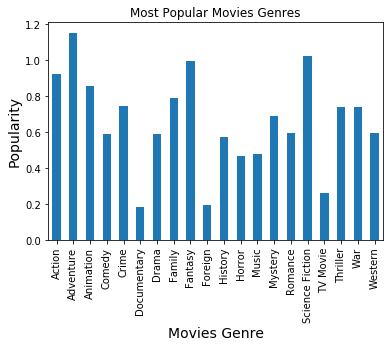

In [23]:
movies_df.groupby('genres').popularity.mean().plot(kind='bar',title='Most Popular Movies Genres');
plt.xlabel('Movies Genre',fontsize=14);
plt.ylabel('Popularity',fontsize=14);

#### As it appears from the diagram that ADVENTURE is the most popular, and SCIENCE FICTION is the second one, and FANTASY is the third.

### Research Question 2 : Are release movies is increased over years or decreased?

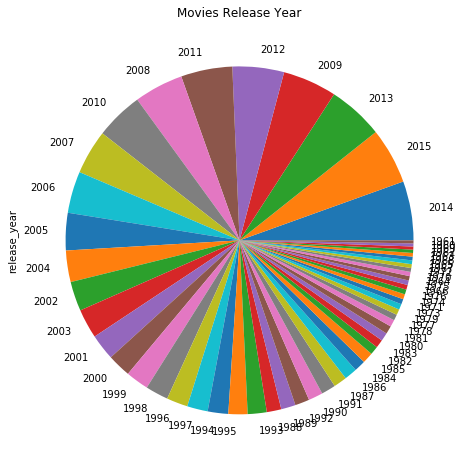

In [24]:
movies_df['release_year'].value_counts().plot(kind='pie',figsize=(8,8),title='Movies Release Year');

####  As it appears in the pie chart that the release of films increases with the passage of years.

<a id='conclusions'></a>
## Conclusions

#### It became clear that ADVENTURE is the most popular genre among other genres of movies. And that releasing movies are  INCREASE with the passing of years.

<a id='Resources'></a>
## Resources

- Udacity courses
- https://stackoverflow.com/questions/55585851/splitting-a-pandas-object
- https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html